In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haberman = pd.read_csv("haberman.csv")  #Loading haberman.csv file into pandas dataFrame.
haberman


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [4]:
print (haberman.shape)  #number of data-points and features

(305, 4)


In [5]:
print (haberman.columns)  #column names in our dataset

Index([u'30', u'64', u'1', u'1.1'], dtype='object')


In [6]:
haberman["1.1"].value_counts()

1    224
2     81
Name: 1.1, dtype: int64

In [7]:
#There are two classes '1','2'
#No.of datapoints belonging to '1' are 224,it means 224 patients survied 5 years or longer
#No.of datapoints belonging to '2' are 81,it means 81 patients died within 5 years
#It is an Imbalanced dataset


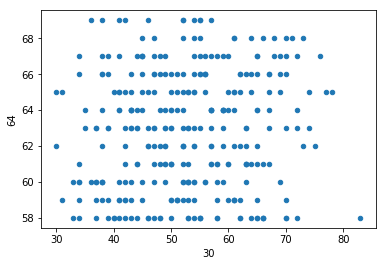

In [8]:
#2-D Scatter-Plot

haberman.plot(kind='scatter', x='30', y='64') ;
plt.show()

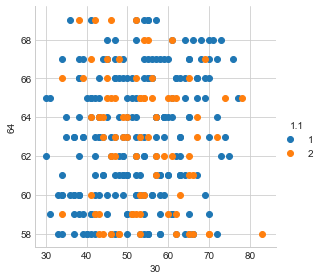

In [10]:
#2-D Scatter plot with color coding for each class

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="1.1", size=4) \
   .map(plt.scatter, "30", "64") \
   .add_legend();
plt.show();

In [11]:
#OBJECTIVE:

#To find whether the patient belong to the "patient survived 5 years or longer" or "patient died within 5 year"
#from the above scatter-plot it is deficult to distinguish

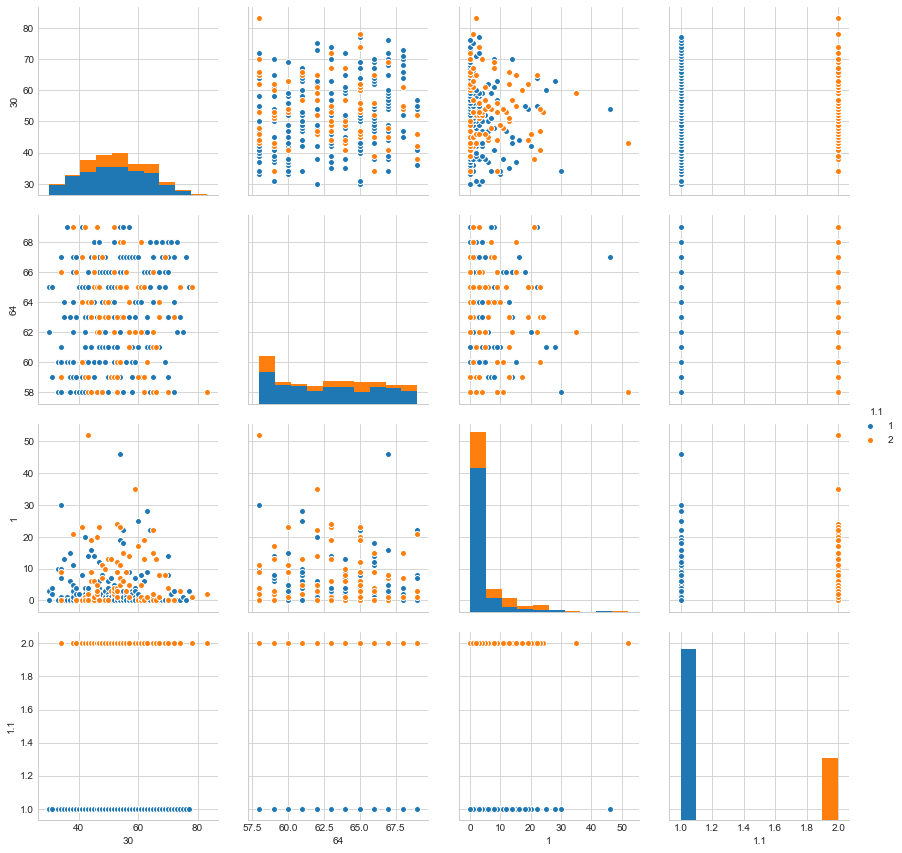

In [16]:
#Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="1.1", size=3);
plt.show()

In [ ]:
#

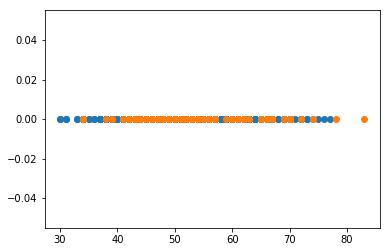

In [7]:
#UNIVARIATE ANALYSIS

import numpy as np
survived=haberman.loc[haberman["1.1"] == 1]
died=haberman.loc[haberman["1.1"] == 2]
plt.plot(survived['30'],np.zeros_like(survived['30']),'o')
plt.plot(died['30'],np.zeros_like(died['30']),'o')
plt.show()

In [21]:
#observation:
#if age<33:then patient survied

#if age>78:then patient died

#due to overlapping we cannot predict for age>33 and age<78

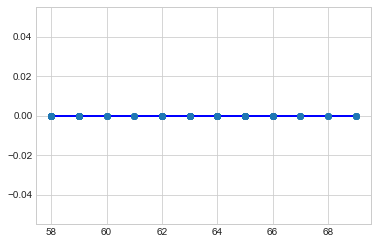

In [30]:
import numpy as np
survived=haberman.loc[haberman["1.1"] == 1]
died=haberman.loc[haberman["1.1"] == 2]
plt.plot(survived['64'],np.zeros_like(survived['30']),'b')
plt.plot(died['64'],np.zeros_like(died['30']),'o')
plt.show()

In [31]:
#year of operation can not be a good option to select for univariate analysis

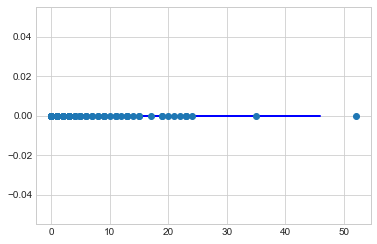

In [34]:
import numpy as np
survived=haberman.loc[haberman["1.1"] == 1]
died=haberman.loc[haberman["1.1"] == 2]
plt.plot(survived['1'],np.zeros_like(survived['30']),'b')
plt.plot(died['1'],np.zeros_like(died['30']),'o')
plt.show()

In [35]:
#if Number of positive auxillary nodes > 35: then the patient died
#So choosing "1" is 'Number of positive auxillary nodes detected' is the perfect univariate

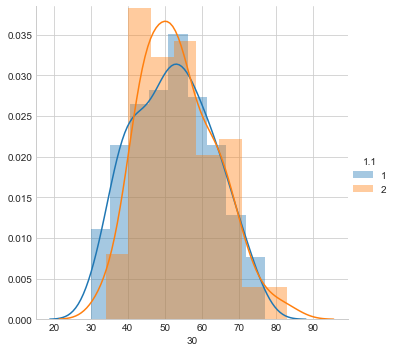

In [36]:
#PDF:

sns.FacetGrid(haberman,hue='1.1',size=5)\
   .map(sns.distplot,'30')\
   .add_legend()
plt.show();

In [37]:
#more overlapping

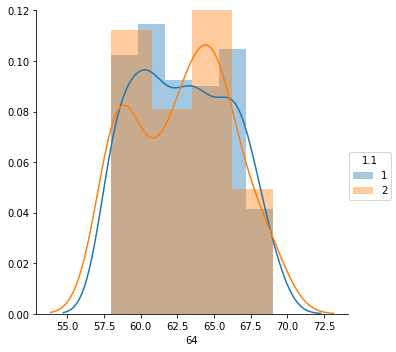

In [3]:
sns.FacetGrid(haberman,hue='1.1',size=5)\
   .map(sns.distplot,'64')\
   .add_legend()
plt.show();

In [4]:
#overlapping

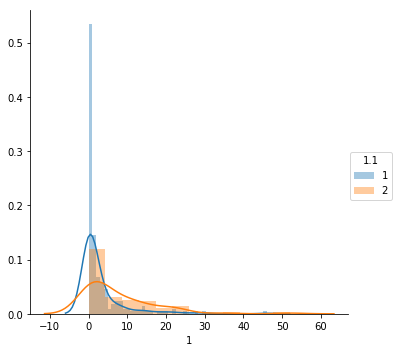

In [5]:
sns.FacetGrid(haberman,hue='1.1',size=5)\
   .map(sns.distplot,'1')\
   .add_legend()
plt.show();

[ 0.83482143  0.08035714  0.02232143  0.02678571  0.01785714  0.00446429
  0.00892857  0.          0.          0.00446429]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


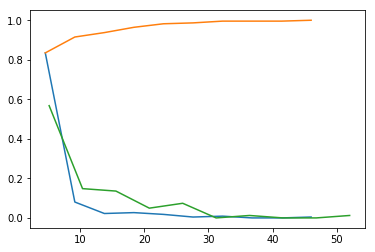

In [10]:
counts, bin_edges = np.histogram(survived['1'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(died['1'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();

[ 0.83482143  0.08035714  0.02232143  0.02678571  0.01785714  0.00446429
  0.00892857  0.          0.          0.00446429]
[  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]


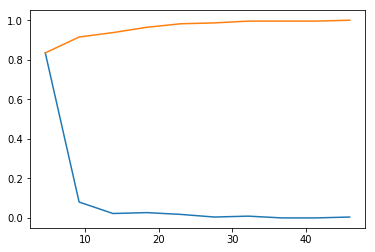

In [11]:
counts, bin_edges = np.histogram(survived['1'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

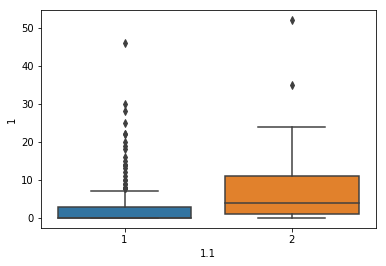

In [13]:
#Box-Plot

sns.boxplot(x='1.1',y='1', data=haberman)
plt.show()

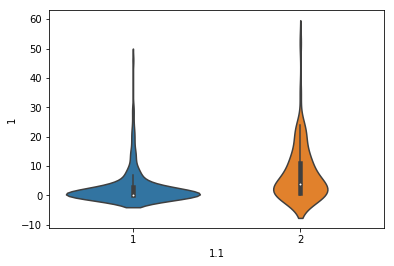

In [14]:
#Violin-Plot

sns.violinplot(x="1.1", y="1", data=haberman, size=8)
plt.show()

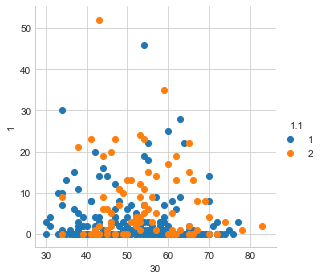

In [15]:
#Bi-Variate Analysis

sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='1.1',size=4).map(plt.scatter,'30','1').add_legend()
plt.show()

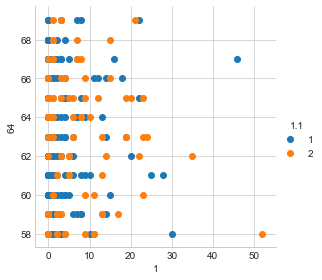

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='1.1',size=4).map(plt.scatter,'1','64').add_legend()
plt.show()

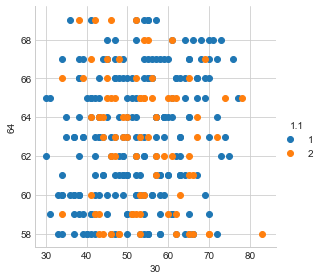

In [17]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue='1.1',size=4).map(plt.scatter,'30','64').add_legend()
plt.show()


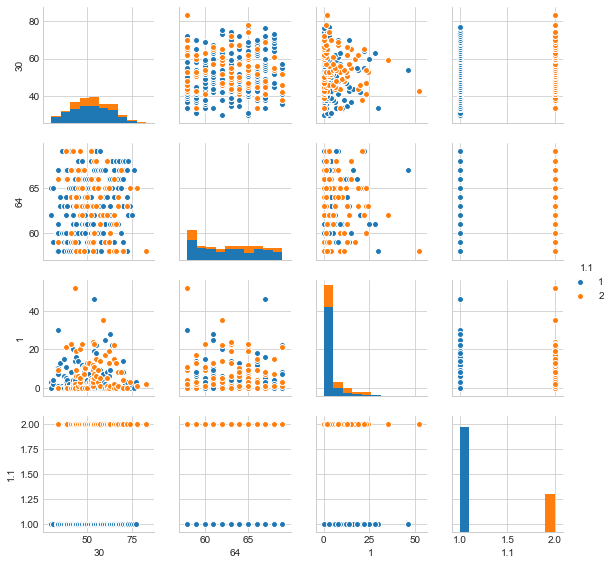

In [18]:
plt.close()
sns.pairplot(haberman,hue="1.1",size=2)
plt.show()